In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import os

DATASET_IMAGE_DIRECTORY = "../dataset/images/"
DATASET_LABEL_DIRECTORY = "../dataset/labels/"

c:\users\borto\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\borto\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\borto\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# ================================================================================
# get_line_info -> Transformar uma linha do arquivo texto para o objeto padrão.
# ================================================================================

def get_line_info(file_name : str, line : str) -> dict:
    # Saída ->
    # filename
    # width
    # height
    # class
    # xmin
    # ymin
    # xmax
    # ymax    
    if line is None:
        return None
    
    columns = line.split(' ')
    
    if len(columns) != 14:
        return None

    frame_size = { 'width' : 640, 'height' : 360 }

    return { "filename" : file_name,
             "width" : 640,
             "height" : 360,
             "class" : int(columns[3]) + 1,
             "xmin" : np.min([np.min([int(columns[6]), int(frame_size['width'])]), np.min([int(columns[7]), int(frame_size['width'])]), np.min([int(columns[8]), int(frame_size['width'])]), np.min([int(columns[9]), int(frame_size['width'])])]),
             "ymin" : np.min([np.min([int(columns[10]), int(frame_size['height'])]), np.min([int(columns[11]), int(frame_size['height'])]), np.min([int(columns[12]), int(frame_size['height'])]), np.min([int(columns[13]), int(frame_size['height'])])]),
             "xmax" : np.max([np.min([int(columns[6]), int(frame_size['width'])]), np.min([int(columns[7]), int(frame_size['width'])]), np.min([int(columns[8]), int(frame_size['width'])]), np.min([int(columns[9]), int(frame_size['width'])])]),
             "ymax" : np.max([np.min([int(columns[10]), int(frame_size['height'])]), np.min([int(columns[11]), int(frame_size['height'])]), np.min([int(columns[12]), int(frame_size['height'])]), np.min([int(columns[13]), int(frame_size['height'])])]),
             "className" : columns[0],
             "prob" : float(columns[1])
           }

# ================================================================================
# load_label_file -> Carregar o arquivo que contém as marcações
# ================================================================================

def load_label_file(label_directory : str, label_file_name : str, image_file_name : str):
    image_files = []
    full_file_path = os.path.join(label_directory, label_file_name)    
    with open(full_file_path, 'r') as file:        
        for line in file:
            info = get_line_info(image_file_name, line)
            if not info is None:
                if info['prob'] <= 0:
                    continue
                image_files.append(info)
    return image_files


# ================================================================================
# get_markup_data -> Carregar as marcações dos arquivos
# ================================================================================

def get_markup_data():
    images = [_ for _ in os.listdir(DATASET_IMAGE_DIRECTORY)]
    labels = [_ for _ in os.listdir(DATASET_LABEL_DIRECTORY)]
    file_marks = []

    for file in labels:

        file_parts = file.split('.')

        if file_parts is None or len(file_parts) == 0:
            continue

        file_name = file_parts[0]

        if int(file_name) > 2250: # Após esta parte, o drone voa
            continue

        file_extension = file_parts[-1]
        find_file_images = list(filter(lambda x: x == "{0}_co.jpg".format(file_name), images))

        if find_file_images is None or len(find_file_images) == 0:
            break;

        label_file_data = load_label_file(
            DATASET_LABEL_DIRECTORY, 
            file, 
            find_file_images[0])

        if label_file_data is None or len(label_file_data) == 0:
            continue

        for _ in label_file_data:
            file_marks.append(_)

    return file_marks


#img = cv2.imread('../dataset/images/00000010_co.png', 0)
#with open('../dataset/labels/00000010.txt', 'r') as file:
#    for line in file:
#        info = get_line_info('00000010_co.png', line)
#        cv2.rectangle(img, (info['xmin'], info['ymin']),(info['xmax'], info['ymax']),(0,255,0),3)
#        #cv2.rectangle(img, (info['2xmin'], info['2ymin']),(info['2xmax'], info['2ymax']),(0,255,0),3)
#    plt.imshow(img)
#    plt.title('Imagem')
#    plt.show()
#cv2.imwrite('d:/temp/teste2.png', img)
#cv2.destroyAllWindows()

In [133]:
def get_render(name : str):
    img = cv2.imread('../dataset/images/%s_co.jpg' % name, 0)
    with open('../dataset/labels/%s.txt' % name, 'r') as file:
        df_render = df[(df.filename == '%s_co.jpg' % name)]
        line = 0
        #for line in file:
        #    info = get_line_info('%s_co.png' % name, line)
        #    if info['prob'] <= 0:
        #        continue            
        #    cv2.rectangle(img, (info['xmin'], info['ymin']),(info['xmax'], info['ymax']),(0,255,0),3)
        for index, row in df_render.iterrows():
            line = line + 1
            
            if row['area_object'] <= 600:
                continue
            
            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText = (int(row['xmin']), int(row['ymin'] - 5))
            fontScale              = 0.5
            fontColor              = (0,255,0)
            lineType               = 2

            cv2.putText(img, str(line) + "." + str(row['className']), 
                bottomLeftCornerOfText, 
                font, 
                fontScale,
                fontColor,
                lineType)
            
            cv2.rectangle(img, (row['xmin'], row['ymin']),(row['xmax'], row['ymax']),(0,255,0),3)
        del df_render
        plt.imshow(img)
        plt.title('Imagem (%s)' % name)
        plt.show()
    cv2.imwrite('d:/temp/output_%s.jpg' % name, img)
    cv2.destroyAllWindows()

In [199]:
data = get_markup_data()
df = pd.DataFrame(data)
df['height_object'] = df.ymax - df.ymin
df['width_object'] = df.xmax - df.xmin
df['area_object'] = df.width_object * df.height_object
#df = df[df.area_object > 600]

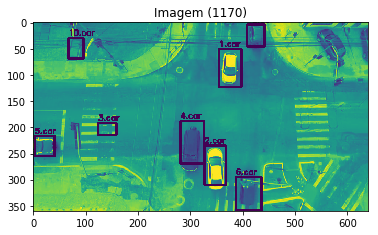

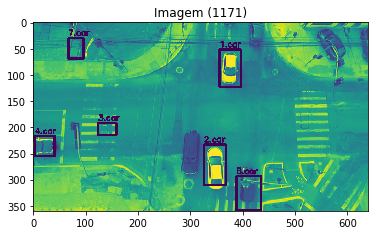

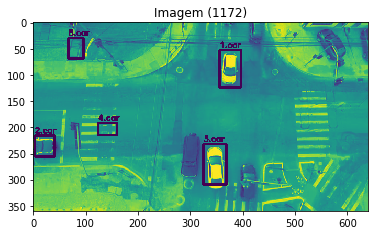

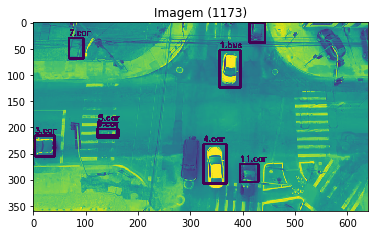

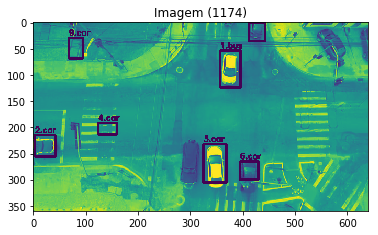

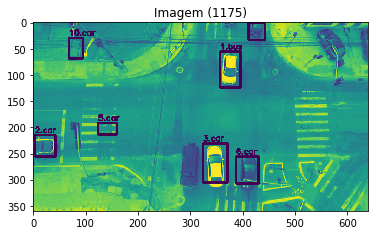

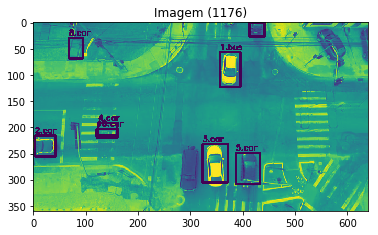

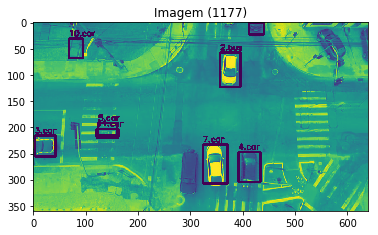

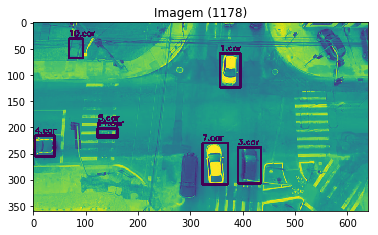

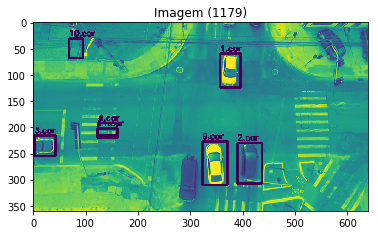

In [202]:
start = 1170
end = start + 10
for i in range(start, end, 1):
    try:
        get_render(str(i))
    except FileNotFoundError:
        continue

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7384 entries, 0 to 10606
Data columns (total 13 columns):
class            7384 non-null int64
className        7384 non-null object
filename         7384 non-null object
height           7384 non-null int64
prob             7384 non-null float64
width            7384 non-null int64
xmax             7384 non-null int64
xmin             7384 non-null int64
ymax             7384 non-null int64
ymin             7384 non-null int64
height_object    7384 non-null int64
width_object     7384 non-null int64
area_object      7384 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 807.6+ KB
